# 1. Gather

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import requests
import json
import string
import re
import random
seed = 1234

import matplotlib.pyplot as plt
import seaborn as sns

# change display setting
pd.set_option('display.max_colwidth', None)

In [3]:
# get tweet image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [3]:
# twitter authentication 
import tweepy

consumer_key = 'xxx'
consumer_secret = 'xxx'
access_token = 'xxx'
access_secret = 'xxx'


In [5]:
# Check Twiter ID
df_tw = pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
df_tw.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [58]:
# Query the Twitter API and store the result(Json Data) in text file

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


tweet_ids = []
for id_ in df_tw.tweet_id: tweet_ids.append(str(id_))
fail_list = []

with open('tweet_json.txt', 'w') as file:
    for id_ in tweet_ids:
        try:
            tweet = api.get_status(id_, tweet_mode='extended')
            json.dump(tweet, file)
            file.write('\n')
            print('Success', id_)
        except tweepy.TweepError as e:
            print("Fail", id_)
            fail_list.append(id_)


Success 892420643555336193
Success 892177421306343426
Success 891815181378084864
Success 891689557279858688
Success 891327558926688256
Success 891087950875897856
Success 890971913173991426
Success 890729181411237888
Success 890609185150312448
Success 890240255349198849
Success 890006608113172480
Success 889880896479866881
Success 889665388333682689
Success 889638837579907072
Success 889531135344209921
Success 889278841981685760
Success 888917238123831296
Success 888804989199671297
Success 888554962724278272
Fail 888202515573088257
Success 888078434458587136
Success 887705289381826560
Success 887517139158093824
Success 887473957103951883
Success 887343217045368832
Success 887101392804085760
Success 886983233522544640
Success 886736880519319552
Success 886680336477933568
Success 886366144734445568
Success 886267009285017600
Success 886258384151887873
Success 886054160059072513
Success 885984800019947520
Success 885528943205470208
Success 885518971528720385
Success 885311592912609280
Succ

Rate limit reached. Sleeping for: 225


Success 759099523532779520
Success 759047813560868866
Success 758854675097526272
Success 758828659922702336
Success 758740312047005698
Success 758474966123810816
Success 758467244762497024
Success 758405701903519748
Success 758355060040593408
Success 758099635764359168
Success 758041019896193024
Success 757741869644341248
Success 757729163776290825
Success 757725642876129280
Success 757611664640446465
Success 757597904299253760
Success 757596066325864448
Success 757400162377592832
Success 757393109802180609
Success 757354760399941633
Success 756998049151549440
Success 756939218950160384
Success 756651752796094464
Success 756526248105566208
Success 756303284449767430
Success 756288534030475264
Success 756275833623502848
Success 755955933503782912
Success 755206590534418437
Success 755110668769038337
Success 754874841593970688
Success 754856583969079297
Success 754747087846248448
Success 754482103782404096
Success 754449512966619136
Success 754120377874386944
Fail 754011816964026368
Succ

Rate limit reached. Sleeping for: 685


Success 677314812125323265
Success 677301033169788928
Success 677269281705472000
Success 677228873407442944
Success 677187300187611136
Success 676975532580409345
Success 676957860086095872
Success 676949632774234114
Success 676948236477857792
Success 676946864479084545
Success 676942428000112642
Success 676936541936185344
Success 676916996760600576
Success 676897532954456065
Success 676864501615042560
Success 676821958043033607
Success 676819651066732545
Success 676811746707918848
Success 676776431406465024
Success 676617503762681856
Success 676613908052996102
Success 676606785097199616
Success 676603393314578432
Success 676593408224403456
Success 676590572941893632
Success 676588346097852417
Success 676582956622721024
Success 676575501977128964
Success 676533798876651520
Success 676496375194980353
Success 676470639084101634
Success 676440007570247681
Success 676430933382295552
Success 676263575653122048
Success 676237365392908289
Success 676219687039057920
Success 676215927814406144
S

In [125]:
len(fail_list), len(df_tw)

(25, 2356)

In [115]:
# Make a dataframe of retweet/favorite count from the text file
df_list = []

with open ('tweet_json.txt', 'r') as json_file:
    for data in json_file:
        tweet_id = json.loads(data)['id']
        retweet_count = json.loads(data)['retweet_count']
        fave_count = json.loads(data)['favorite_count']

        df_list.append({'tweet_id': str(tweet_id),
                        'retweet_count' : int(retweet_count),
                        'favorite_count' : int(fave_count)})
df_tw_count = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [122]:
df_tw_count.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7491,35483
1,892177421306343426,5559,30705


In [120]:
# save data
df_tw_count.to_csv('twitter_count.csv', index = False)

# 2. Assess

### 2.1 The WeRateDogs twitter archive 

In [7]:
# Quick look
df_tw.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
882,760290219849637889,NaN,NaN,2016-08-02 01:44:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Rocco. He's doing his best. 13/10 someone help him (IG: rocco_roni) https://t.co/qFsl1nnXMv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760290219849637889/video/1,13,10,Rocco,None,None,None,None
264,842163532590374912,NaN,NaN,2017-03-16 00:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet George. He looks slightly deflated but overall quite powerful. Not sure how that human restrained him. 12/10 would snug with permission https://t.co/o6E0hB3xZl,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/842163532590374912/photo/1,https://twitter.com/dog_rates/status/842163532590374912/photo/1",12,10,George,None,None,None,None
1526,690374419777196032,NaN,NaN,2016-01-22 03:24:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phred. He's an Albanian Flepperkush. Tongue is rather impressive if I'm honest. Perhaps even legendary 11/10 https://t.co/VpfFCKE28C,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690374419777196032/photo/1,11,10,Phred,None,None,None,None
1099,735991953473572864,NaN,NaN,2016-05-27 00:32:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Maxaroni. He's curly af. Also rather fabulous. 11/10 would hug well https://t.co/A216OjIdca,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/735991953473572864/photo/1,https://twitter.com/dog_rates/status/735991953473572864/photo/1,https://twitter.com/dog_rates/status/735991953473572864/photo/1",11,10,Maxaroni,None,None,None,None


**Text includes not only the text but also the URL of the tweet.**

In [8]:
# check the information
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- Dtype: <br>
&nbsp;- Timestamp is not time series data.<br>
&nbsp;- Five columns relates to ID are not string/object.<br>
- Dog stage is not in one column. <br>

In [9]:
df_tw[(pd.notnull(df_tw['in_reply_to_status_id'])) | (pd.notnull(df_tw['retweeted_status_id']))].shape

(259, 17)

**259 tweets are not the original and 2097 tweets are the original**

In [10]:
# Check duplication
df_tw['tweet_id'].duplicated().sum()

0

In [11]:
# Check the statistical description
df_tw.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- rating_numerator: Min. 0 should be checked just in case. Max.1776 is suspiciously large, considering 75 percentile is just 12.<br>
- rating_denominator: Min. is 0. Max.170 should be also checked as normal denominator is 10.

In [12]:
# Further assessmen in numetator (Min. == 0)
df_tw[df_tw.rating_numerator == 0].text

315           When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object

**Min. 0 is correct.**

In [13]:
# Further assess numerator (Max. == 1776)
df_tw[df_tw.rating_numerator == 1776].text

979    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object

**Max. numerator is also correct**

In [14]:
# Further assessmen in denominator (Min. == 0)
df_tw[df_tw.rating_denominator == 0].text

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object

In [15]:
df_tw[df_tw.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


**This is not an original tweet and also 0 is not correct. This will be solved when we remove retweet/reply from this table.**

In [16]:
# Further assess denominator (Max. == 170)
df_tw[df_tw.rating_denominator == 170].text

1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object

**Max. denominator is also correct.**

In [17]:
# Further assess denominator which is larger than 10
df_tw[df_tw.rating_denominator > 10][['tweet_id', 'rating_numerator', 'rating_denominator','text']]

,tweet_id,rating_numerator,rating_denominator,text
342,832088576586297345,11,15,@docmisterio account started on 11/15/15
433,820690176645140481,84,70,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
784,775096608509886464,9,11,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…"
902,758467244762497024,165,150,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068,740373189193256964,9,11,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1120,731156023742988288,204,170,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165,722974582966214656,4,20,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,716439118184652801,50,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1228,713900603437621249,99,90,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254,710658690886586372,80,80,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12


**In general, denomitor seems calculated as "10 * the number of dog" and it can be bigger than 10. However, I see some incorrect denomitor as well. Also where the denominator is wrong, the numerator tends to be wrong together.**<br>
**Also, it will be more easy to understand the rating if there is a column of ratio, as denomitor is not united.**

**From here, I will check each column further.**

In [18]:
# check colomn name
df_tw.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [19]:
df_tw[df_tw.floofer == 'floofer'].text

46       Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP
200     At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
582                                              This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5
774                                         Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744
984                              This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with https://t.co/HHUAnBb6QB
1022                                   Here's a golden floofer helping with the groceries. Bed got in way. Still 11/10 helpful af (vid 

**According to the Dogtionary, "floof" is synonym of "floofer". Therefore, we need to check if floof is included in the dog stage of floofer.**

In [20]:
# check if floof is included in the floofer category
df_tw[(df_tw.text.str.contains('floof')) & (df_tw.floofer != 'floofer')][['tweet_id', 'text', 'floofer']]

,tweet_id,text,floofer
25,887101392804085760,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,None
53,881906580714921986,This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ,None
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,None
622,796080075804475393,This is Yogi. He's 98% floof. Snuggable af. 12/10 https://t.co/opoXKxmfFm,None
630,794332329137291264,This is Nimbus (like the cloud). He just bought this fancy af duck raincoat. Only protects one ear tho. 12/10 so h*ckin floofy https://t.co/SIQbb8c3AU,None
740,780543529827336192,Here's a perturbed super floof. 12/10 would snug so damn well https://t.co/VG095mi09Q,None
790,773922284943896577,"This is Heinrich (pronounced ""Pat""). He's a Botswanian Vanderfloof. Snazzy af bandana. 12/10 downright puptacular https://t.co/G56ikYAqFg",None
959,751251247299190784,This is Gilbert. He's being chased by a battalion of miniature floof cows. 10/10 we all believe in you Gilbert https://t.co/wayKZkDRTG,None
1001,747933425676525569,Pls don't send more sherks. I don't care how seemingly floofy they are. It does me so much frighten. Thank u. 11/10 https://t.co/oQqlOsla4R,None
1161,723912936180330496,This is Sugar. She's a Bolivian Superfloof. Spherical af. 12/10 would never let go of https://t.co/AhMfUu6Onm,None


**Some tweet including "floof" is not coreectly reflected in the stage category "floofer". These should be updated.**

In [22]:
# Check dog name with very short name
df_tw[df_tw.name.str.len() <= 2].name.unique()

array(['a', 'Mo', 'Bo', 'an', 'O', 'Al', 'my', 'by', 'Ed', 'JD', 'Jo'],
      dtype=object)

**Some of them looks like not a name such as "a".**

In [23]:
# Check names　
df_tw.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [24]:
# I see some pronoun and articles in the name column. 
list_pronoun = ['my','his','her','this','the']

In [25]:
df_tw[df_tw.name.isin(list_pronoun)][['tweet_id', 'name', 'text']]

,tweet_id,name,text
852,765395769549590528,my,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB
992,748692773788876800,his,That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7
1120,731156023742988288,this,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1527,690360449368465409,the,Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx
1603,685943807276412928,the,This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn
1797,677269281705472000,the,This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb
1815,676613908052996102,the,This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF
2037,671561002136281088,the,This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU
2212,668587383441514497,the,Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3
2345,666063827256086533,the,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK


**Some names are registered wrongly. Also, these assessments show that the incorrect names usually start with lower case. It looks like a word after "Here is", "This is" etc. are registered as name.**

In [26]:
# Fileter names start with lowercase.
lower_list = list(string.ascii_lowercase)

df_tw[df_tw.name.str.startswith(tuple(lower_list))][['tweet_id', 'name', 'text']]

,tweet_id,name,text
22,887517139158093824,such,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
56,881536004380872706,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
118,869988702071779329,quite,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
169,859196978902773760,quite,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
193,855459453768019968,quite,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x"
...,...,...,...
2349,666051853826850816,an,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc
2350,666050758794694657,a,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe
2352,666044226329800704,a,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx
2353,666033412701032449,a,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR


In [27]:
df_tw[df_tw.name.str.startswith(tuple(lower_list))][['tweet_id', 'name', 'text']][:10]

,tweet_id,name,text
22,887517139158093824,such,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
56,881536004380872706,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
118,869988702071779329,quite,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
169,859196978902773760,quite,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
193,855459453768019968,quite,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x"
335,832645525019123713,not,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7
369,828650029636317184,one,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK"
542,806219024703037440,incredibly,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi
649,792913359805018113,a,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
682,788552643979468800,mad,RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX


**Theese names are incorrectly registered.**

### 2.2 Image prediction data

In [28]:
df_image = pd.read_csv('image_predictions.tsv', delimiter = '\t')

In [29]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1369,761976711479193600,https://pbs.twimg.com/media/CpMVxoRXgAAh350.jpg,3,Labrador_retriever,0.475552,True,Chesapeake_Bay_retriever,0.082898,True,Staffordshire_bullterrier,0.048464,True
936,703425003149250560,https://pbs.twimg.com/media/CcMRSwUW8AAxxNC.jpg,1,miniature_pinscher,0.292866,True,sleeping_bag,0.142122,False,Italian_greyhound,0.070849,True
890,699323444782047232,https://pbs.twimg.com/media/CbR-9edXIAEHJKi.jpg,1,Labrador_retriever,0.309696,True,doormat,0.303700,False,sliding_door,0.077266,False
789,690597161306841088,https://pbs.twimg.com/media/CZV-c9NVIAEWtiU.jpg,1,Lhasa,0.097500,True,koala,0.091934,False,sunglasses,0.091505,False
1597,799063482566066176,https://pbs.twimg.com/media/CxbX_n2WIAAHaLS.jpg,2,Norfolk_terrier,0.334436,True,Norwich_terrier,0.231573,True,Australian_terrier,0.214203,True


**Some of the predictions are not dog. Also, three predictions are included.**

In [30]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Data type of tweet_id should be object.**

In [31]:
# Check duplication
df_image['tweet_id'].duplicated().sum()

0

**There is no duplication.**

In [32]:
# Check summary statistics
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### 2.3 Retweet/favorite count data

In [33]:
df_tw_count = pd.read_csv('twitter_count.csv')

In [34]:
df_tw_count.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7491,35483
1,892177421306343426,5559,30705
2,891815181378084864,3681,23088
3,891689557279858688,7669,38774
4,891327558926688256,8273,37039


In [35]:
df_tw_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


**Tweet_id is not string.**

In [36]:
# Check duplication
df_tw_count['tweet_id'].duplicated().sum()

0

**Also, data is stored in three tables, although it is a single observational unit. Unnecessary columns are also included in some tables.**

### 2.4 Conclusion

#### Quality issues 
##### ◆The WeRateDogs Twitter archive
&nbsp;-Wrong Data type: <br>
>&nbsp;Timestamp (->time series data)<br>
&nbsp;Tweet_id (-> string/object)<br>

&nbsp;-Some denominators and numerators are incorrect.<br>
&nbsp;-Ratio of rating is missing.<br>
&nbsp;-Some of the "Floof" are not included in floofer stage.<br>
&nbsp;-Some dog names are incorrect.<br> 
##### ◆Image prediction
&nbsp;-Some predisctions are not a dog.<br>
&nbsp;-Tweet ID is not string/object.<br>
##### ◆Retweet/favorite count data
&nbsp;-Tweet ID is not string/object.<br>
<br>
#### Tidiness issues
##### ◆Twitter archive data
&nbsp;-Text column includes URL of the tweets.<br>
&nbsp;-Retweets / replies are included.<br>
&nbsp;-Dog stage is not in one column.<br>
##### ◆Image prediction
&nbsp;-There are three predictions with the different level of confidence.<br>
##### ◆General
&nbsp;-A single observational unit is stored in three dataframe.<br> 
&nbsp;-Some unnecessary columns are included.<br> 

# 3. Clean

In [37]:
# Copy data
df_clean = df_tw.copy()

### 3.1 The WeRateDogs twitter archive

#### 3.1.1 Tidiness issue : Retweets / replys are included.

Define :remove rows of non-original tweets(retweet or reply) and retweet/reply related columns.

In [38]:
# Code : remove non-original tweets
df_clean = df_clean[(pd.isnull(df_clean['in_reply_to_status_id'])) & (pd.isnull(df_clean['retweeted_status_id']))]

In [39]:
# Test
df_clean[(pd.notnull(df_clean['in_reply_to_status_id'])) | (pd.notnull(df_clean['in_reply_to_user_id']))|(pd.notnull(df_clean['retweeted_status_id']))|(pd.notnull(df_clean['retweeted_status_user_id']))|(pd.notnull(df_clean['retweeted_status_timestamp']))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [40]:
# Code : drop irrelevant columns
df_clean = df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1).reset_index(drop = True)

In [41]:
# Test
df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


#### 3.1.2 Quality issue : Wrong Data type

Define：Change data type<br>
1. Time stamp should be time series data. As I will remove retweeted_status_timestamp later, I will keep this as it is for now.<br> 
2. Tweet ID should be string/object. Other ID related columns will be removed later so that I will keep it as it is for now.


In [42]:
# Code : 1
df_clean.timestamp = pd.to_datetime(df_tw['timestamp']) 

In [43]:
# test : 1
df_clean.timestamp

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2092   2015-11-29 01:52:48+00:00
2093   2015-11-29 01:45:22+00:00
2094   2015-11-29 01:35:26+00:00
2095   2015-11-29 00:39:59+00:00
2096   2015-11-29 00:06:39+00:00
Name: timestamp, Length: 2097, dtype: datetime64[ns, UTC]

In [44]:
#Code : 2
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)

In [45]:
# test : 1,2
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

#### 3.1.3 Quality issue: Incorrect denominators and numerators

Define: Assess and correct visually where denominators are bigger than 10. There is higher chance that the numerator is also wrong, when denominator is wrong. Therefore, I will check and correct both of them.

In [46]:
# Code : filter by denominator > 10
df_clean[df_clean.rating_denominator > 10][['tweet_id','text','rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
339,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
700,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
853,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
904,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
948,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
985,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1011,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1036,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1056,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1129,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


In [47]:
# Code: Make dictionary with the correct rating
correct_rating = {'tweet_id':['740373189193256964', '722974582966214656', '716439118184652801', '682962037429899265'],
                 'rating_numerator':[14, 13, 11, 10],
                 'rating_denominator':[10, 10, 10, 10]}

In [48]:
df_clean[df_clean['tweet_id'].isin(correct_rating['tweet_id'])][['tweet_id','text','rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
853,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
948,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
985,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1426,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11


In [49]:
# Overwrite the correct number
df_clean.at[853,'rating_numerator'] = 14
df_clean.at[948,'rating_numerator'] = 13
df_clean.at[985,'rating_numerator'] = 11
df_clean.at[1426,'rating_numerator'] = 10
df_clean.at[853,'rating_denominator'] = 10
df_clean.at[948,'rating_denominator'] = 10
df_clean.at[985,'rating_denominator'] = 10
df_clean.at[1426,'rating_denominator'] = 10

In [50]:
# test
df_clean[df_clean['tweet_id'].isin(correct_rating['tweet_id'])][['tweet_id','text','rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
853,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10
948,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10
985,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10
1426,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10,10


### 3.1.4 Quality issue: Ratio of rating is missing

Define: Insert the ratio of rating.

In [51]:
# Code
df_clean['rating_ratio'] = (df_clean['rating_numerator']/df_clean['rating_denominator']).astype(float)

In [52]:
# Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
 12  rating_ratio        2097 non-null 

In [53]:
df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_ratio
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,1.3


#### 3.1.5 Quality issue: Some of the "Floof" are not included in floofer stage

Define: filter the rows with the text including "Floof" and categorise them in floofer stage

In [54]:
# Code 
df_clean.loc[df_clean.text.str.contains('floof', case = False),'floofer'] = 'floofer'

In [55]:
# Check
df_clean[df_clean.text.str.contains('floof', case = False)][['text','floofer']]

,text,floofer
24,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,floofer
42,Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,floofer
49,This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ,floofer
161,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",floofer
339,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,floofer
450,This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5,floofer
470,This is Yogi. He's 98% floof. Snuggable af. 12/10 https://t.co/opoXKxmfFm,floofer
476,This is Nimbus (like the cloud). He just bought this fancy af duck raincoat. Only protects one ear tho. 12/10 so h*ckin floofy https://t.co/SIQbb8c3AU,floofer
569,Here's a perturbed super floof. 12/10 would snug so damn well https://t.co/VG095mi09Q,floofer
571,We only rate dogs. Pls stop sending in non-canines like this Urban Floof Giraffe. I can't handle this. 11/10 https://t.co/zHIqpM5Gni,floofer


#### 3.1.6 Quality issue: Some dog names are incorrect.

Define: filter names starts with lowercase and change them into Nan

In [56]:
# Code: Filter 
df_clean[df_clean.name.str.startswith(tuple(lower_list))][['tweet_id', 'name', 'text']]

,tweet_id,name,text
21,887517139158093824,such,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
51,881536004380872706,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
141,859196978902773760,quite,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
156,855459453768019968,quite,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x"
263,832645525019123713,not,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7
...,...,...,...
2090,666051853826850816,an,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc
2091,666050758794694657,a,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe
2093,666044226329800704,a,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx
2094,666033412701032449,a,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR


In [57]:
# Code: overwrite
df_clean.loc[df_clean.name.str.startswith(tuple(lower_list)), 'name'] = None

In [58]:
# test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1993 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
 12  rating_ratio        2097 non-null 

**Now name column has 104 missing data.**

#### 3.1.7 Tidiness issue: text column includes both text and URL of the tweets.

Define: split text and URL in the column by slicing (URL is 23 charactors) and make a new colmn called "URL"

In [59]:
df_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_ratio
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,1.2


In [60]:
len('https://t.co/AtUZn91f7f')

23

In [61]:
df_clean['url'] = df_clean['text'].str[-23:]

In [62]:
df_clean['text'] = df_clean['text'].str[:-23]

In [63]:
# Test
df_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_ratio,url
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,1.3,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,1.3,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,1.2,https://t.co/wUnZnhtVJB


#### 3.1.8 Tidiness issue: Dog stage is not in one column.

Define: Melt four dog stage columns into one column.

In [64]:
# Code
stages = ['doggo','floofer', 'pupper', 'puppo']

for stage in stages:
    df_clean[stage].replace('None', '', inplace=True)

In [65]:
df_clean['dog_stage']= df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

In [66]:
df_clean['dog_stage'] = df_clean['dog_stage'].replace(r'^\s*$', np.NaN, regex=True)

In [67]:
df_clean['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'floofer', 'pupper', 'doggopuppo',
       'doggofloofer', 'doggopupper', 'flooferpupper'], dtype=object)

In [68]:
# insert comma for the columns with multiple stages
df_clean.loc[df_clean.dog_stage == 'doggopuppo','dog_stage'] = 'doggo, puppo'
df_clean.loc[df_clean.dog_stage == 'doggofloofer','dog_stage'] = 'doggo, floofer'
df_clean.loc[df_clean.dog_stage == 'doggopupper','dog_stage'] = 'doggo, pupper'
df_clean.loc[df_clean.dog_stage == 'flooferpupper','dog_stage'] = 'floofer, pupper'

In [69]:
# Test
df_clean['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'floofer', 'pupper', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper', 'floofer, pupper'], dtype=object)

In [70]:
df_clean.groupby('dog_stage').count()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_ratio,url
dog_stage,,,,,,,,,,,,,,
doggo,71,71,71,71,71,71,71,69,71,71,71,71,71,71
"doggo, floofer",2,2,2,2,2,2,2,2,2,2,2,2,2,2
"doggo, pupper",9,9,9,9,9,9,9,8,9,9,9,9,9,9
"doggo, puppo",1,1,1,1,1,1,1,1,1,1,1,1,1,1
floofer,36,36,36,36,36,36,36,33,36,36,36,36,36,36
"floofer, pupper",1,1,1,1,1,1,1,1,1,1,1,1,1,1
pupper,220,220,220,220,219,220,220,209,220,220,220,220,220,220
puppo,23,23,23,23,23,23,23,23,23,23,23,23,23,23


**I will remove each stage's column later.**

### 3.2 The tweet image predictions data

#### 3.2.1 Quality issue: Some predictions are not a dog breed. & Tidiness issue: Three predictions are included.

Define: filter the rows with a prediction other than a dog and make it None. And make one column containing the dog breed with highest confidence interval.

In [71]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [72]:
# Code: Make new column
df_image['prediction'] = df_image.p1
df_image['predict_conf'] = df_image.p1_conf

In [73]:
df_image.loc[((df_image['p1_dog'] == False) & (df_image['p2_dog'] == True)), 'prediction'] = df_image.p2
df_image.loc[((df_image['p1_dog'] == False) & (df_image['p2_dog'] == True)), 'predict_conf'] = df_image.p2_conf

In [74]:
df_image.loc[((df_image['p1_dog'] == False) & (df_image['p2_dog'] == False) & (df_image['p3_dog'] == True)), 'prediction'] = df_image.p3
df_image.loc[((df_image['p1_dog'] == False) & (df_image['p2_dog'] == False) & (df_image['p3_dog'] == True)), 'predict_conf'] = df_image.p3_conf

In [75]:
df_image.loc[((df_image['p1_dog'] == False) & (df_image['p2_dog'] == False) & (df_image['p3_dog'] == False)), 'prediction'] = np.NaN
df_image.loc[((df_image['p1_dog'] == False) & (df_image['p2_dog'] == False) & (df_image['p3_dog'] == False)), 'predict_conf'] = np.NaN

In [76]:
# Test
df_image[['prediction', 'predict_conf']]

,prediction,predict_conf
0,Welsh_springer_spaniel,0.465074
1,redbone,0.506826
2,German_shepherd,0.596461
3,Rhodesian_ridgeback,0.408143
4,miniature_pinscher,0.560311
...,...,...
2070,basset,0.555712
2071,Labrador_retriever,0.168086
2072,Chihuahua,0.716012
2073,Chihuahua,0.323581


#### 3.2.1 Quality issue: Data type of Tweet_id is not a string. 

Define: Change data type of Tweet_id row into string.

In [77]:
# Code
df_image['tweet_id'] = df_image['tweet_id'].astype(str)

In [78]:
# Test
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      2075 non-null   object 
 1   jpg_url       2075 non-null   object 
 2   img_num       2075 non-null   int64  
 3   p1            2075 non-null   object 
 4   p1_conf       2075 non-null   float64
 5   p1_dog        2075 non-null   bool   
 6   p2            2075 non-null   object 
 7   p2_conf       2075 non-null   float64
 8   p2_dog        2075 non-null   bool   
 9   p3            2075 non-null   object 
 10  p3_conf       2075 non-null   float64
 11  p3_dog        2075 non-null   bool   
 12  prediction    1751 non-null   object 
 13  predict_conf  1751 non-null   float64
dtypes: bool(3), float64(4), int64(1), object(6)
memory usage: 184.5+ KB


### 3.3 Retweet/favorite count data

#### 3.3.1 Quality issue: Data type of Tweet_id is not a string.

Define: Change data type of Tweet_id into string.

In [79]:
# Code
df_tw_count['tweet_id'] = df_tw_count['tweet_id'].astype(str)

In [80]:
# Test
df_tw_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


### 3.4 Genral 

#### 3.4.1 Tidiness Issue: A single observational unit is stored in three tables.

Define: Merge three tables into one table.

In [81]:
# Code
df_clean_merged = pd.merge(df_clean, df_tw_count, how = 'left', on = 'tweet_id')

In [82]:
# Test
df_clean_merged.shape

(2097, 17)

In [83]:
# Code
df_clean_merged = pd.merge(df_clean_merged, df_image, how = 'left', on = 'tweet_id')

In [84]:
# Test
df_clean_merged.shape

(2097, 30)

#### 3.4.2 Quality Issue: unnecessary columns are included.

Define: Remove not usuful columns. 

In [85]:
# Code
df_clean_merged.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'rating_ratio', 'url', 'dog_stage', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'prediction',
       'predict_conf'],
      dtype='object')

In [86]:
df_clean_merged = df_clean_merged[['tweet_id','timestamp', 'url','text', 'rating_numerator', 'rating_denominator', 'rating_ratio','name', 'dog_stage', 'retweet_count','favorite_count', 'prediction', 'predict_conf']]

In [87]:
# test
df_clean_merged.head(1)

,tweet_id,timestamp,url,text,rating_numerator,rating_denominator,rating_ratio,name,dog_stage,retweet_count,favorite_count,prediction,predict_conf
0,892420643555336193,2017-08-01 16:23:56+00:00,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,1.3,Phineas,NaN,7491.0,35483.0,NaN,NaN


# Storing

In [88]:
# save df_clean_merged
df_clean_merged.to_csv('twitter_archive_master.csv', index = False)

# Analyzing and Visualizing

In [89]:
# At least three (3) insights and one (1) visualization
df_clean_merged.head(1)

,tweet_id,timestamp,url,text,rating_numerator,rating_denominator,rating_ratio,name,dog_stage,retweet_count,favorite_count,prediction,predict_conf
0,892420643555336193,2017-08-01 16:23:56+00:00,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,1.3,Phineas,NaN,7491.0,35483.0,NaN,NaN


In [90]:
df_clean_merged.describe()

,rating_numerator,rating_denominator,rating_ratio,retweet_count,favorite_count,predict_conf
count,2097.000000,2097.000000,2097.000000,2090.000000,2090.000000,1666.000000
mean,12.178827,10.423939,1.170305,2459.191866,8184.641148,0.551571
std,40.355989,6.585322,3.965855,4305.177153,11900.414560,0.298923
min,0.000000,2.000000,0.000000,11.000000,70.000000,0.000010
25%,10.000000,10.000000,1.000000,547.250000,1811.750000,0.305955
50%,11.000000,10.000000,1.100000,1192.000000,3734.000000,0.550914
75%,12.000000,10.000000,1.200000,2794.500000,10233.750000,0.822939
max,1776.000000,170.000000,177.600000,75727.000000,152988.000000,0.999956


In [91]:
df_clean_merged['dog_stage'].value_counts()

pupper             220
doggo               71
floofer             36
puppo               23
doggo, pupper        9
doggo, floofer       2
floofer, pupper      1
doggo, puppo         1
Name: dog_stage, dtype: int64

**Pupper is the most frequent dog stage and the puppo is the least frequent.**

In [92]:
# Check the correlation with the dog stage excluding the one with multiple dog stages.
df_clean_merged[['rating_ratio', 'retweet_count', 'favorite_count']].corr()

,rating_ratio,retweet_count,favorite_count
rating_ratio,1.000000,0.022809,0.021967
retweet_count,0.022809,1.000000,0.926331
favorite_count,0.021967,0.926331,1.000000


**This shows weak positive correlation between rating ratio and retweet/favorite count, and strong positive correlation between retweet count and favorite count.**

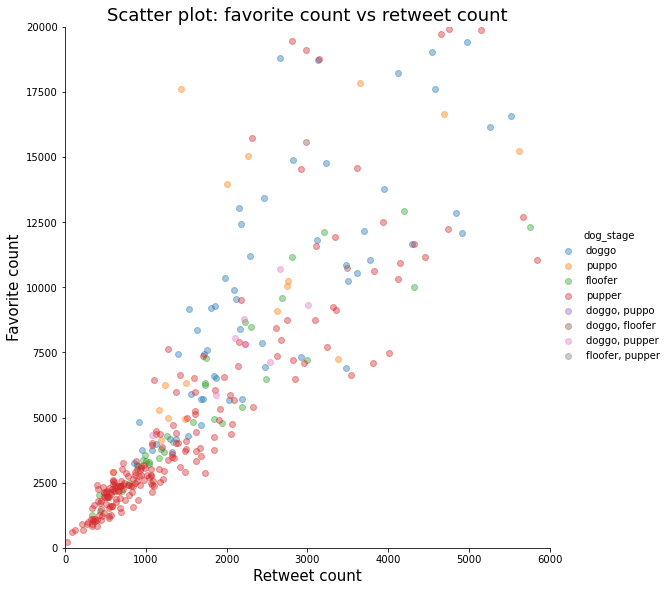

In [93]:
# Scatter plot 
sns.lmplot(x = 'retweet_count', y = 'favorite_count', data = df_clean_merged, fit_reg = False, hue = 'dog_stage', scatter_kws={'alpha':0.4}, height = 8, aspect = 1)
ax=plt.gca()
ax.set( xlim=(0, 6000), ylim = (0, 20000))
ax.set_title('Scatter plot: favorite count vs retweet count', fontsize = 18)
ax.set_xlabel('Retweet count', fontsize = 15)
ax.set_ylabel('Favorite count', fontsize = 15)
fig = ax.get_figure()
fig.savefig("scatter_plot.png");

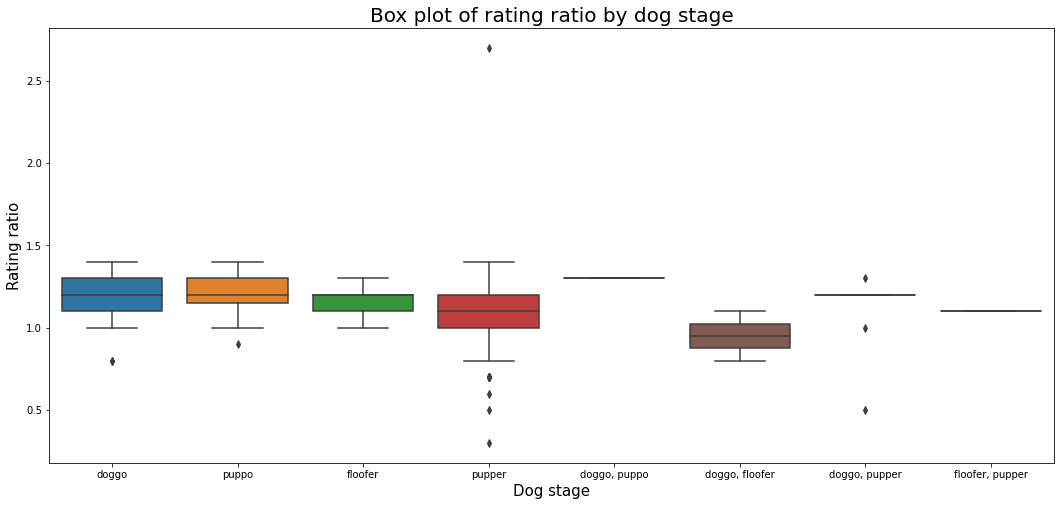

In [94]:
plt.figure(figsize=(18,8))
ax = sns.boxplot(df_clean_merged.dog_stage, df_clean_merged.rating_ratio)
plt.title('Box plot of rating ratio by dog stage', fontsize = 20)
plt.xlabel('Dog stage', fontsize = 15)
plt.ylabel('Rating ratio', fontsize = 15)
plt.show()
fig = ax.get_figure()
fig.savefig("box_plot.png")

**There is no significant difference of rating ratio between dog stages. However, pupper has more lower outlier and the median is lower than doggo and puppo.**

In [95]:
df_breed = df_clean_merged[['prediction', 'rating_ratio']].groupby('prediction').mean().reset_index()

In [96]:
df_breed['count'] = df_clean_merged[['prediction', 'rating_ratio']].groupby('prediction').count().rating_ratio.to_frame(name = 'count').reset_index().iloc[:,1]

In [97]:
df_breed.sort_values(by = 'count',ascending = False)

,prediction,rating_ratio,count
89,golden_retriever,1.171337,156
37,Labrador_retriever,1.119811,106
49,Pembroke,1.142553,94
16,Chihuahua,1.053333,90
101,pug,1.024194,62
...,...,...,...
34,Irish_wolfhound,1.100000,1
107,standard_schnauzer,1.200000,1
21,EntleBucher,1.100000,1
11,Bouvier_des_Flandres,1.300000,1


In [98]:
df_breed[df_breed['count'] > 10].sort_values(by = 'rating_ratio',ascending = False)

,prediction,rating_ratio,count
50,Pomeranian,1.253659,41
89,golden_retriever,1.171337,156
55,Samoyed,1.169048,42
94,kuvasz,1.152941,17
28,Great_Pyrenees,1.146667,15
49,Pembroke,1.142553,94
81,chow,1.141667,48
22,Eskimo_dog,1.140909,22
83,cocker_spaniel,1.133333,30
92,kelpie,1.130769,13


**Retriever is the most popular here. (Goldern retriever is 156 and Labrador retriever is 106) And, The highest rating per breed which is appeared more than 10 times is 1.256 and the breed is Pomeranian. 1.256 is significantly high considering 75th percentile is 1.2.**